In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [3]:
## Create dataset

X, y = make_classification(
   n_samples=1000,
   n_features=10,
   n_classes=2,
   random_state=42 
)

In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)


LogisticRegression()

In [7]:
y_pred = logistic.predict(X_test)


In [8]:
logistic.predict_proba(X_test)

array([[7.74477909e-01, 2.25522091e-01],
       [3.36684957e-02, 9.66331504e-01],
       [6.70682154e-01, 3.29317846e-01],
       [7.98668032e-02, 9.20133197e-01],
       [9.76616650e-01, 2.33833501e-02],
       [4.13572804e-02, 9.58642720e-01],
       [9.79028767e-01, 2.09712329e-02],
       [9.59367261e-01, 4.06327393e-02],
       [8.08520049e-01, 1.91479951e-01],
       [6.84954318e-01, 3.15045682e-01],
       [9.13669448e-01, 8.63305524e-02],
       [2.63597018e-01, 7.36402982e-01],
       [5.25844192e-01, 4.74155808e-01],
       [2.11912354e-01, 7.88087646e-01],
       [7.93592056e-01, 2.06407944e-01],
       [9.46621678e-01, 5.33783219e-02],
       [2.62957933e-02, 9.73704207e-01],
       [3.24212617e-01, 6.75787383e-01],
       [3.14803584e-01, 6.85196416e-01],
       [2.04956217e-01, 7.95043783e-01],
       [5.04587065e-01, 4.95412935e-01],
       [9.66703630e-01, 3.32963696e-02],
       [2.00514796e-01, 7.99485204e-01],
       [7.77891908e-01, 2.22108092e-01],
       [8.729863

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [10]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8466666666666667


<Axes: >

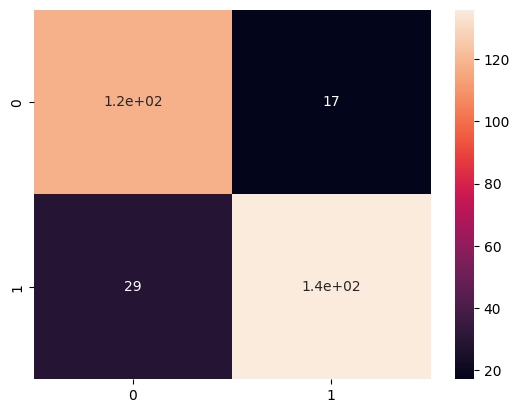

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## Hyperparameter Tuning and Cross Validation

In [16]:
model = LogisticRegression()

penalty = ['l1','l2','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']

In [17]:
params = dict(penalty=penalty, C=c_values, solver=solvers)


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [23]:
cv=StratifiedKFold(n_splits=5)
grid = GridSearchCV(estimator=model, 
                    param_grid=params,
                    scoring='accuracy',
                    cv=cv,
                    n_jobs=-1)

In [24]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [25]:
grid.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linea

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [26]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [27]:
grid.best_score_

np.float64(0.8785714285714287)

In [29]:
y_pred = grid.predict(X_test)

In [30]:
score=accuracy_score(y_test, y_pred)
print(score)

0.8533333333333334


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



<Axes: >

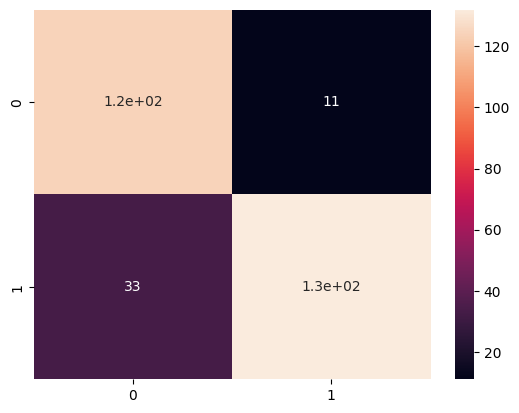

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## Randomized Search CV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    scoring='accuracy',
    cv=5
)

In [34]:
random_search.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [35]:
random_search.best_score_

np.float64(0.8699999999999999)

In [36]:
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

In [37]:
y_pred = random_search.predict(X_test)

In [38]:
score = accuracy_score(y_test, y_pred)
print(score)

0.8433333333333334


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       135
           1       0.88      0.82      0.85       165

    accuracy                           0.84       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300



## Multiclass classification

In [40]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_classes=3,
    random_state=15
)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(
    multi_class='ovr'
)

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [43]:
print(accuracy_score(y_test, y_pred))

0.79


In [44]:
print(confusion_matrix(y_test, y_pred))

[[84 10  8]
 [ 3 74 25]
 [10  7 79]]


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       102
           1       0.81      0.73      0.77       102
           2       0.71      0.82      0.76        96

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



## Logistic Regression for Imbalanced Dataset

In [46]:
from collections import Counter
from sklearn.datasets import make_classification

In [48]:
X, y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1,
                           n_redundant=0, weights=[0.99], random_state=10)

In [49]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

<Axes: xlabel='0', ylabel='1'>

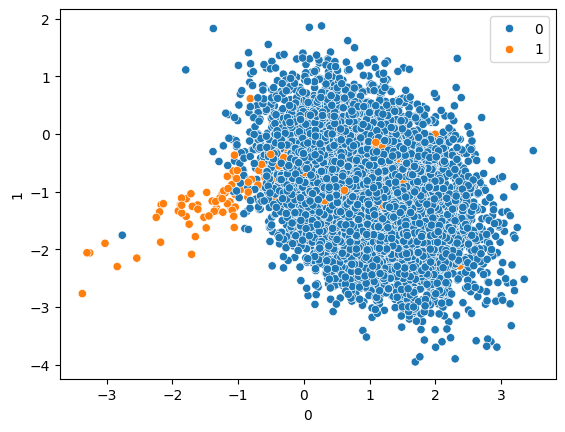

In [51]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
model = LogisticRegression()
 
penalty = ['l1','l2','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]


In [54]:
params=dict(penalty=penalty, C=c_values, solver=solvers, class_weight=class_weight)

In [55]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=params,
                    scoring='accuracy', n_jobs=-1)


In [58]:
grid.fit(X_train, y_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linea

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [59]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [60]:
grid.best_score_

np.float64(0.9882666666666667)

In [61]:
y_pred = grid.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

<Axes: >

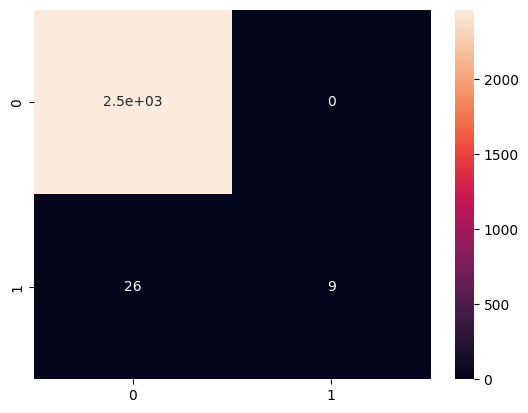

In [64]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [65]:
accuracy_score(y_test, y_pred)

0.9896

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500



## Logistic Regression with ROC Curve and ROC AUC score

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve

In [68]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [71]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
model_proba = model.predict_proba(X_test)

In [75]:
model_proba = model_proba[:, 1]

In [77]:
dummy_model_roc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_proba)

print(dummy_model_roc)
print(model_auc)

0.5
0.9108885464817668


In [80]:
dummy_fpr, dummy_tpr,  _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresolds = roc_curve(y_test, model_proba)

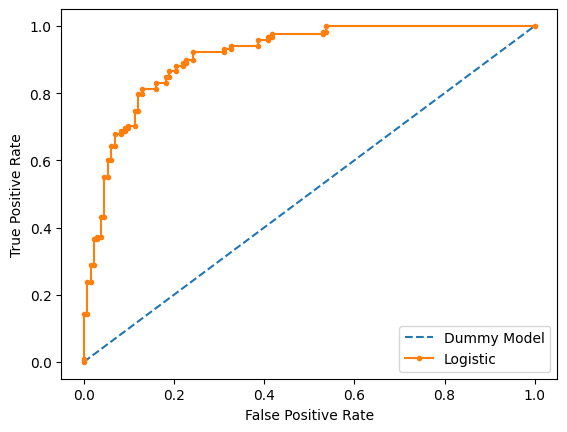

In [79]:
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

/tmp/ipykernel_21622/1354299012.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


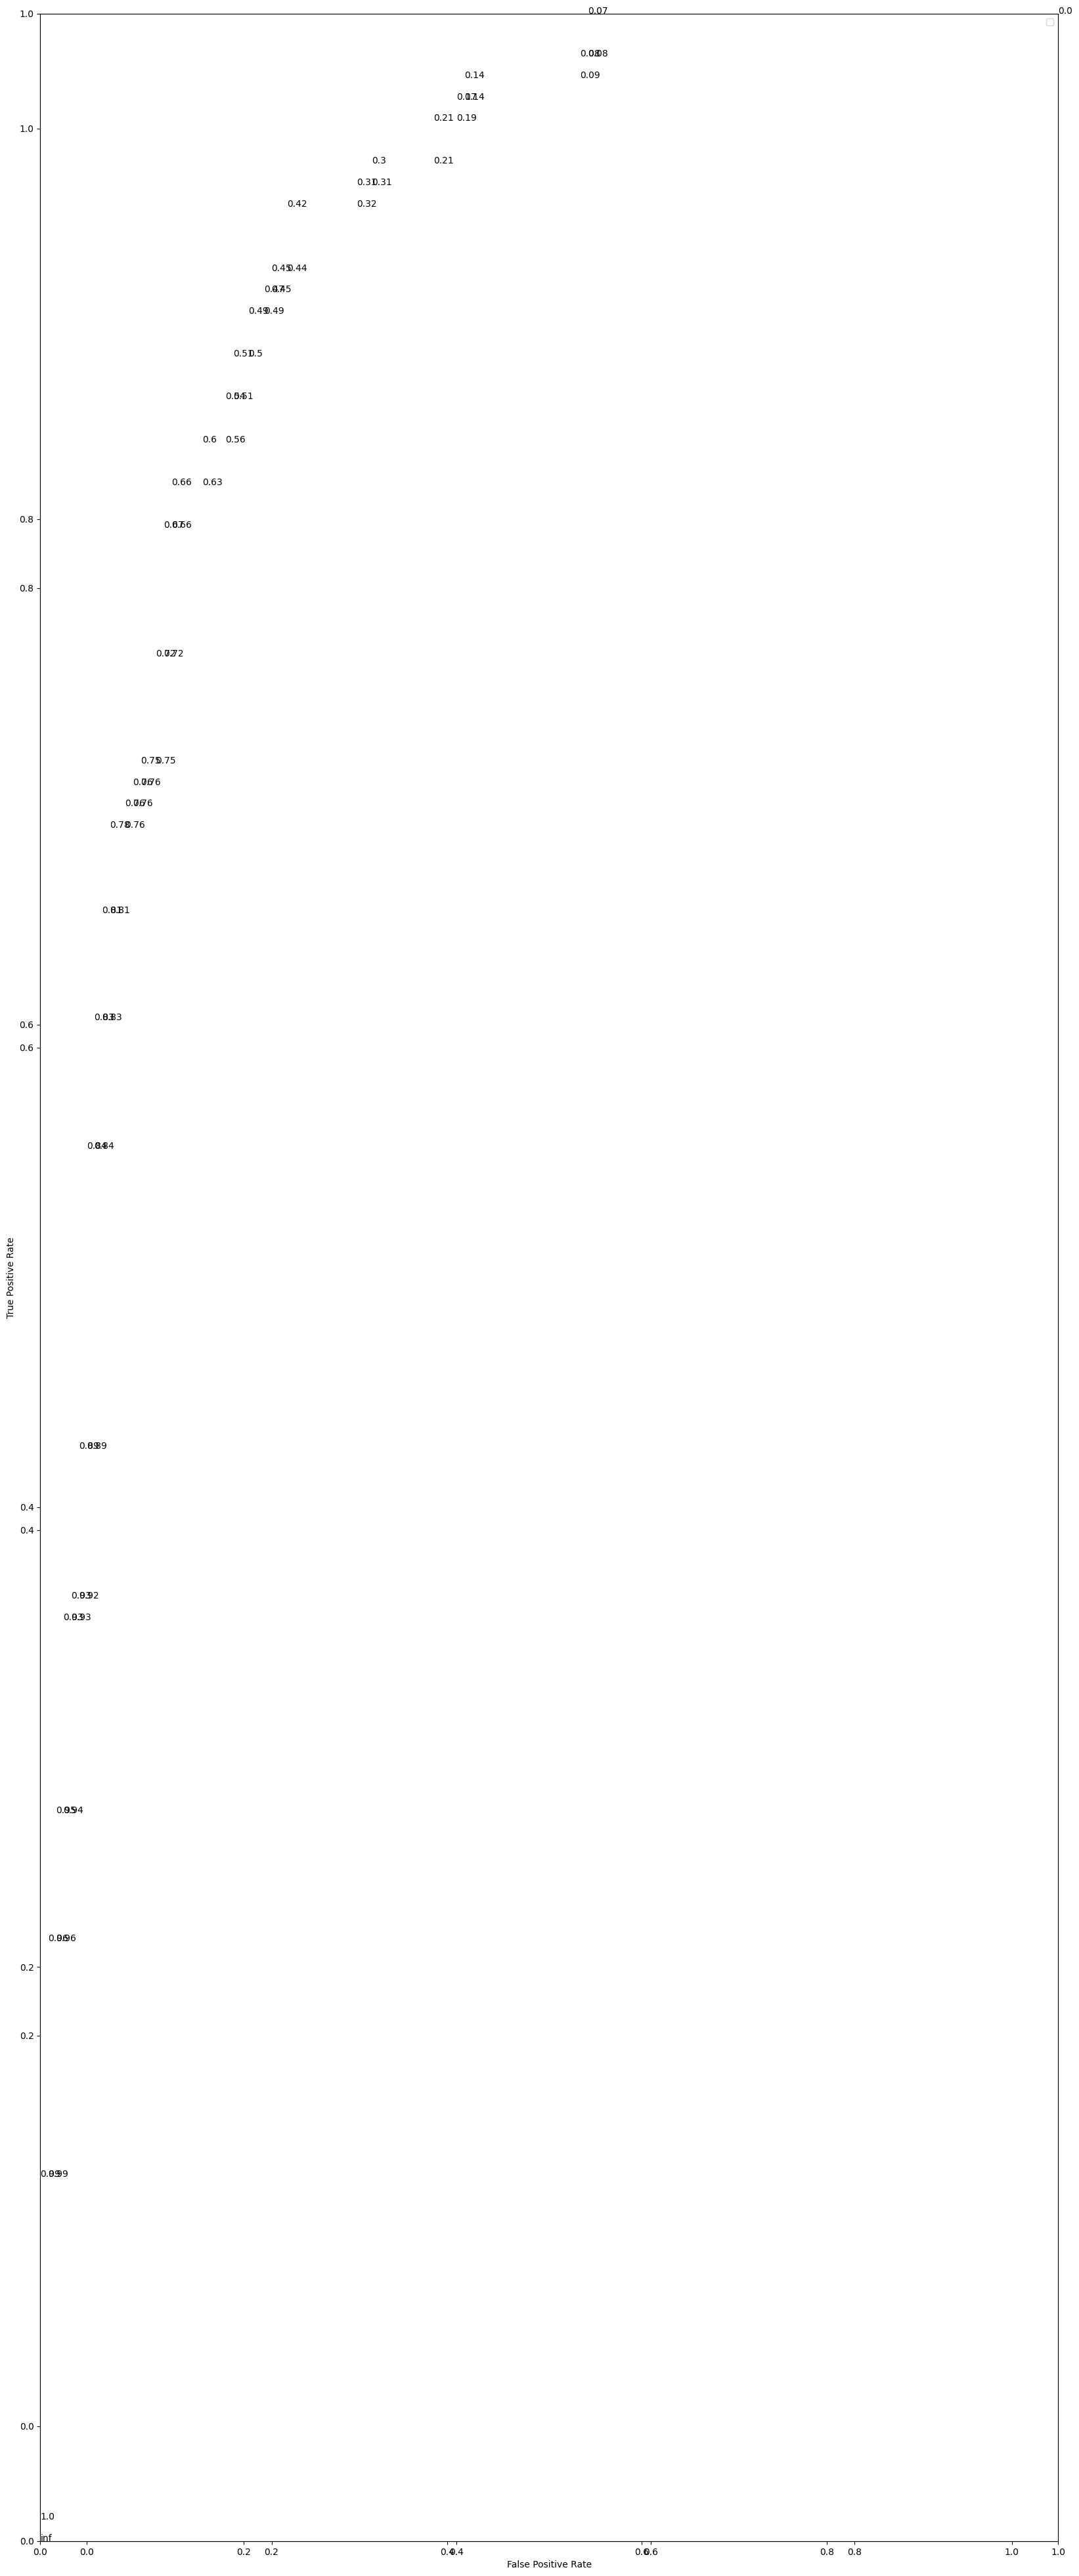

In [81]:
import numpy as np

fig = plt.figure(figsize=(20, 50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, thresolds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()